<a href="https://colab.research.google.com/github/jokend1ng/jokend1ng/blob/main/%D1%80%D0%B0%D1%81%D0%BA%D1%80%D0%B0%D1%81%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.layers import Conv2D,UpSampling2D,InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from skimage.color import rgb2lab,lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


Загружаем картинку


In [48]:
upl=files.upload()
names=list(upl.keys())
img =Image.open(BytesIO(upl[names[0]]))


Saving photo_259586.jpg to photo_259586.jpg


In [49]:
def processed_image(img):
    image=img.resize((256,256),Image.BILINEAR)
    image=np.array(image,dtype=float)
    size=image.shape
    lab=rgb2lab(1.0/255*image)
    X,Y = lab[:,:,0],lab[:,:,1:]

    Y/=128
    X=X.reshape(1,size[0],size[1],1)
    Y=Y.reshape(1,size[0],size[1],2)
    return X, Y, size

In [50]:
X,Y,size=processed_image(img)


In [51]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))


In [52]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.0244
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.8676
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.8660
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.8673
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.8619
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.4012
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.0457
Epoch 8/50
1/1 [==============================] - 1s 1s/step - loss: 0.0314
Epoch 9/50
1/1 [==============================] - 1s 1s/step - loss: 0.0283
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.0259
Epoch 11/50
1/1 [==============================] - 1s 1s/step - loss: 0.0246
Epoch 12/50
1/1 [==============================] - 1s 1s/step - loss: 0.0224
Epoch 13/50
1/1 [==============================] - 1s 1s/step - loss: 0.0214
Epoch 14

In [53]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X, Y, size = processed_image(img)


Saving maxresdefault.jpg to maxresdefault (2).jpg


In [54]:
output = model.predict(X)

In [55]:
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

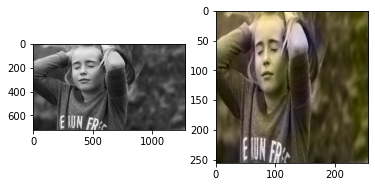

In [56]:
cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))